In [2]:
#필요 라이브러리 다운
!pip3 install konlpy

In [3]:
#수집한 데이터 불러오기
import pandas as pd
test=pd.read_csv("./drive/My Drive/Colab Notebooks/output.csv")
print(len(test))
test.head()

733490


,Unnamed: 0,desc,score
0,0,벌레도 없고 쥐도 없다 오래된 아파트 치고 괜찮은 곳이지만 일조량과 좋은공기로 선택...,3.0
1,1,버스덩류장이 매우가까우나 아파트와 버스정류장의 사이에 울타리가 있어 불편하다 주변에...,2.0
2,2,아파트 2단지에 1명의 경비원분만 계셔서 물건을 찾으러갈때마다 전화하고 기다려야한다...,3.0
3,3,층간소음이 있지만 별로 예민하지 않아서 참을만하다 햇볕은 앞 아파트가 가려서 잘 드...,2.0
4,4,버스 한정거장이면 이마트를 갈 수 있고 날씨가 좋으면 산책겸 마트로 산책겸 걸어갈수...,1.0


In [4]:
# 필요없는 컬럼인 unnamed 제거
del test["Unnamed: 0"]
test.head()


,desc,score
0,벌레도 없고 쥐도 없다 오래된 아파트 치고 괜찮은 곳이지만 일조량과 좋은공기로 선택...,3.0
1,버스덩류장이 매우가까우나 아파트와 버스정류장의 사이에 울타리가 있어 불편하다 주변에...,2.0
2,아파트 2단지에 1명의 경비원분만 계셔서 물건을 찾으러갈때마다 전화하고 기다려야한다...,3.0
3,층간소음이 있지만 별로 예민하지 않아서 참을만하다 햇볕은 앞 아파트가 가려서 잘 드...,2.0
4,버스 한정거장이면 이마트를 갈 수 있고 날씨가 좋으면 산책겸 마트로 산책겸 걸어갈수...,1.0


In [5]:
#스코어 3.0인 중립적인 요소 제거
idx_3=test[test['score']==3].index
test=test.drop(idx_3)
test.head()

,desc,score
1,버스덩류장이 매우가까우나 아파트와 버스정류장의 사이에 울타리가 있어 불편하다 주변에...,2.0
3,층간소음이 있지만 별로 예민하지 않아서 참을만하다 햇볕은 앞 아파트가 가려서 잘 드...,2.0
4,버스 한정거장이면 이마트를 갈 수 있고 날씨가 좋으면 산책겸 마트로 산책겸 걸어갈수...,1.0
5,그냥 추천해주고 싶지는 않다 소음도 있고 하기 때문이다 그래서 나는 추천 하고 싶지 않가,1.0
7,수도관이 동파 되었을 때 치워주자 않고 담배냄새가 나도 방송하지 않았다,2.0


In [6]:
# 스코어 2.0 보다 큰 경우에 1 작은 경우 0으로 처리
test=test.assign(outcome=(test['score']>2).astype(int))
test.head(10)

,desc,score,outcome
1,버스덩류장이 매우가까우나 아파트와 버스정류장의 사이에 울타리가 있어 불편하다 주변에...,2.0,0
3,층간소음이 있지만 별로 예민하지 않아서 참을만하다 햇볕은 앞 아파트가 가려서 잘 드...,2.0,0
4,버스 한정거장이면 이마트를 갈 수 있고 날씨가 좋으면 산책겸 마트로 산책겸 걸어갈수...,1.0,0
5,그냥 추천해주고 싶지는 않다 소음도 있고 하기 때문이다 그래서 나는 추천 하고 싶지 않가,1.0,0
7,수도관이 동파 되었을 때 치워주자 않고 담배냄새가 나도 방송하지 않았다,2.0,0
9,주변환경은 나무는 많디만 공기가 좋은 편은 아니다 그리고 냄새도 심하고 주차장으로 ...,2.0,0
10,가까이에 음식점이 많고 영화관도 있어 여가 생활에 편리하다 하지만 공원 같은 시설이...,4.0,1
11,쪽문으로 나가면 버스 정류장이 있어 편하다 차도 별로 안 막힘,4.0,1
13,보일러를 틀어도 늦게 따뜻해지는 방이 있다 하지만 어느 방이나 햇빛이 잘 들어와 만...,5.0,1
14,식당이 많아 외식하기에 편하다 하지만 밤에 시끄럽다 영화관이 있어 주말에 나가기 편...,4.0,1


sample 개수 573655
   outcome   count
0        0   57912
1        1  515743
True
desc       10
score       2
outcome     0
dtype: int64
False


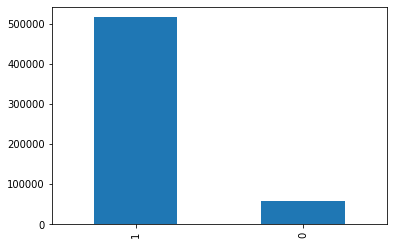

In [7]:
# 긍정 리뷰 부정 리뷰 개수 시각화
print("sample 개수",len(test))
test['outcome'].value_counts().plot(kind='bar')
print(test.groupby('outcome').size().reset_index(name = 'count'))
# null값을 가진 샘플 확인
print(test.isnull().values.any())
print(test.isnull().sum())
test.loc[test.desc.isnull()]
test.loc[test.score.isnull()]
test = test.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(test.isnull().values.any()) # Null 값이 존재하는지 확인

In [8]:
# 긍정 리뷰가 너무 많아 58000개 정도와 부정 리뷰 합치기
positive=test[test['outcome']==1][0:58000]
negative=test[test['outcome']==0]
test=pd.concat([positive,negative])
print(len(test))


115910


sample 개수 115910
   outcome  count
0        0  57910
1        1  58000
False
desc       0
score      0
outcome    0
dtype: int64
False


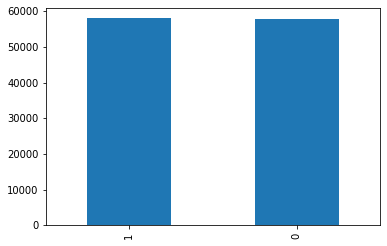

In [9]:
# 긍정 리뷰 부정 리뷰 개수 시각화
print("sample 개수",len(test))
test['outcome'].value_counts().plot(kind='bar')
print(test.groupby('outcome').size().reset_index(name = 'count'))
# null값을 가진 샘플 확인
print(test.isnull().values.any())
print(test.isnull().sum())
test.loc[test.desc.isnull()]
test.loc[test.score.isnull()]
test = test.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(test.isnull().values.any()) # Null 값이 존재하는지 확인

In [10]:
# desc 열에서 중복인 내용이 있다면 중복 제거
test['desc'].nunique(), test['outcome'].nunique()
test.drop_duplicates(subset=['desc'], inplace=True) 
print(len(test))

115845


In [24]:
import numpy as np
from konlpy.tag import Okt
test.drop_duplicates(subset = ['desc'], inplace=True) # desc 열에서 중복인 내용이 있다면 중복 제거
test['desc'] = test['desc'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test['desc'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test = test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test))

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','있어서','있고']
okt = Okt()

X_train = []

for sentence in test['desc']:
    temp=[]
    temp_X = okt.morphs(sentence,stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    # for i in range(len(temp_X)):
    #   #품사 중 동사와 명사만 뽑음
    #   if temp_X[i][1] in ['Adjective','Verb']:
    #     temp.append(temp_X[i][0])
    
    #if temp:
    X_train.append(temp_X)
print(X_train[:3])

전처리 후 테스트용 샘플의 개수 : 115841
[['가까이', '음식점', '많다', '영화관', '있다', '여가', '생활', '편리하다', '하지만', '공원', '같다', '시설', '조금', '모자라다'], ['쪽문', '나가다', '버스', '정류장', '있다', '편하다', '차도', '별로', '안', '막히다'], ['보일러', '틀다', '늦다', '따뜻하다', '방이', '있다', '하지만', '어느', '방이', '나', '햇빛', '자다', '들어오다', '만족하다', '층간소음', '별로', '없다', '편이', '다']]


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [26]:
#빈도수를 기준으로 단어 집합을 생성

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)

In [27]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 26045
등장 빈도가 2번 이하인 희귀 단어의 수: 13465
단어 집합에서 희귀 단어의 비율: 51.69898253023612
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.6268372055553162


In [28]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12582


In [29]:
#정수 인코딩
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
print(X_train[:1])

[[110, 378, 10, 324, 2, 762, 165, 21, 68, 38, 26, 36, 51, 1960]]


In [30]:
y_train = np.array(test['outcome'])
print(y_train[:3])

[1 1 1]


In [31]:
print(len(X_train),len(y_train))

115841 115841


In [32]:
#train , test 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.1, shuffle=True,random_state=1004)

In [33]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

104256
104256
리뷰의 최대 길이 : 277
리뷰의 평균 길이 : 23.029619398403927


In [35]:
max_len = 100
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 99.82255217925108


In [36]:
#서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [37]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/model/nopos_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [40]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
1391/1391 [==============================] - ETA: 0s - loss: 0.4210 - acc: 0.8135
Epoch 00001: val_acc improved from -inf to 0.82548, saving model to nopos_model.h5
1391/1391 [==============================] - 324s 233ms/step - loss: 0.4210 - acc: 0.8135 - val_loss: 0.3963 - val_acc: 0.8255
Epoch 2/15
1391/1391 [==============================] - ETA: 0s - loss: 0.3465 - acc: 0.8552
Epoch 00002: val_acc improved from 0.82548 to 0.85517, saving model to nopos_model.h5
1391/1391 [==============================] - 326s 234ms/step - loss: 0.3465 - acc: 0.8552 - val_loss: 0.3457 - val_acc: 0.8552
Epoch 3/15
1391/1391 [==============================] - ETA: 0s - loss: 0.3126 - acc: 0.8724
Epoch 00003: val_acc improved from 0.85517 to 0.86423, saving model to nopos_model.h5
1391/1391 [==============================] - 327s 235ms/step - loss: 0.3126 - acc: 0.8724 - val_loss: 0.3313 - val_acc: 0.8642
Epoch 4/15
1391/1391 [==============================] - ETA: 0s - loss: 0.2943 - acc:

In [44]:
loaded_model=load_model("/content/nopos_model.h5")
print("\n 테스트 정확도:" ,(loaded_model.evaluate(X_test, y_test)))

363/363 [==============================] - 11s 31ms/step - loss: 0.3237 - acc: 0.8665

 테스트 정확도: [0.3237065374851227, 0.8664652705192566]


In [49]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [50]:
sentiment_predict('근처에는 마트가 있어서 조금 편리할것이다 그리고 근처에 분식집과 있고 미용실도있고 놀이터,운동 시설 등이 있어서 편할것이다')
sentiment_predict('주변 은파호수공원이 있어서 가볍게 산책하기가 좋고, 대학교 근처로 인근 편의 생활 양호함.유흥가가 없어서 아이키우기 좋음')
sentiment_predict('부정적이다. 시끄럽고 안좋다.')

85.24% 확률로 긍정 리뷰입니다.

99.39% 확률로 긍정 리뷰입니다.

76.86% 확률로 부정 리뷰입니다.

